# MNIST with micrograd
In this notebook, you will implement a 2-layer (784-800-10) fully connected
feed-forward neural network for MNIST classification.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import csv
import micrograd.nn as nn
from micrograd.engine import Value
%matplotlib inline

First, let's setup our dataset. Keras automatically splits the MNIST data into
train and test segments for us.

The "x" variables are the images, while the "y" variables are the ground truths.

In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
print(f"{train_x.shape=}\n{train_y.shape=}\n{test_x.shape=}\n{test_y.shape=}")

11490434/11490434 [==============================] - 1s 0us/step
train_x.shape=(60000, 28, 28)
train_y.shape=(60000,)
test_x.shape=(10000, 28, 28)
test_y.shape=(10000,)


Let's visualize one of the data points:

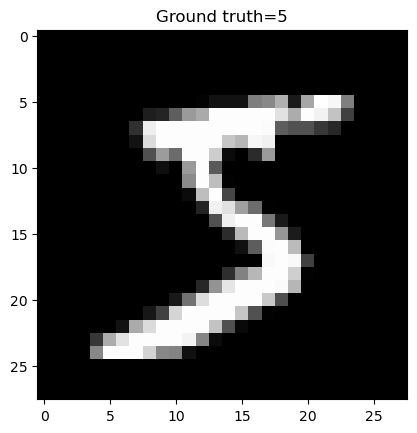

In [3]:
plt.imshow(train_x[0], cmap="gray")
plt.title(f"Ground truth={train_y[0]}");

Now that we have our data loaded, we can initialize our model, using the
abstractions we wrote in `micrograd/nn.py` (imported above as `nn`).

Remember that we are looking to create a multi-layer perceptron, with one hidden
layer of dimension 800, an input layer of 784, and output layer of 10.

Since our input dimension is now 784, we need to remember to reshape the input
images (and normalize).

In [4]:
model = nn.MLP(784, [800, 10])

train_x = train_x.reshape(-1, 784) / 255
test_x = test_x.reshape(-1, 784) / 255

Copy your implementation of softmax from step two:

In [5]:
def softmax(z: list[Value], C:int=10) -> list[Value]:
  denom = sum(list(zi.exp() for zi in z))
  return list(zi.exp() / denom for zi in z)

Now we can try evaluating the model (with random weights).

In [6]:
softmax(model(train_x[0]))

[Value(data=5.771592089496452e-59, grad=0),
 Value(data=7.520080908293728e-77, grad=0),
 Value(data=2.1430714148553027e-49, grad=0),
 Value(data=1.7681776093777289e-32, grad=0),
 Value(data=2.499163503499745e-35, grad=0),
 Value(data=0.00032041983330338567, grad=0),
 Value(data=8.996270267771324e-07, grad=0),
 Value(data=1.78684974774138e-19, grad=0),
 Value(data=4.276052183200776e-33, grad=0),
 Value(data=0.9996786805396699, grad=0)]

Unfortunately, our engine is way to slow to train this much larger model. As such,
pre-trained weights have been provided in the weights.csv file. The code below
loads these weights into your model.

In [7]:
with open("weights.csv", "r") as f:
  reader = csv.reader(f)
  weights = list(reader)

for i, p in enumerate(model.parameters()):
  p.data = float(weights[i][0])

Now that our model is trained, let's try running it on some test examples.
Try changing `SAMPLE_IDX` to see different examples.

NOTE: This may be quite slow, depending on your computer.

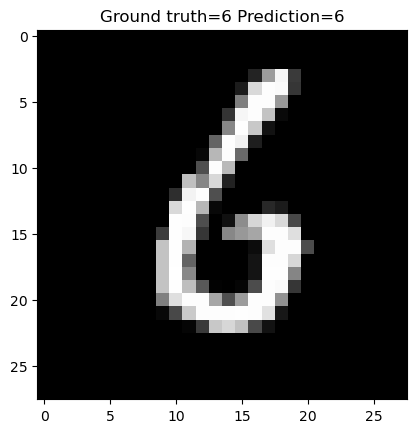

In [9]:
SAMPLE_IDX = 50

pred = softmax(model(test_x[SAMPLE_IDX]))
pred_idx = pred.index(max(pred, key=lambda x: x.data))
plt.imshow(test_x[SAMPLE_IDX].reshape(28,28), cmap="gray")
plt.title(f"Ground truth={test_y[SAMPLE_IDX]} Prediction={pred_idx}");